In [1]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint
from resnets_utils import *
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import os
from ResNet50 import ResNet50
from ResNet18 import ResNet18
from CNN50 import CNN50
%matplotlib inline

In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# with the per-pixel mean substracted
X_train_mean = np.mean(X_train, axis=0)
X_train -= X_train_mean
X_test -= X_train_mean

# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [3]:
# a learning rate scheduler to change the learning rate
def my_schedule(epoch):
    if epoch > 180:
        learning_rate = 5e-7
    elif epoch > 160:
        learning_rate = 1e-6
    elif epoch > 120:
        learning_rate = 1e-5
    elif epoch > 80:
        learning_rate = 1e-4
    else:
        learning_rate = 1e-3
    print('Learning rate: ', learning_rate)
    return learning_rate

scheduler = LearningRateScheduler(my_schedule)

save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'Res_50_model.h5' 
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

# Prepare callbacks for model saving and for learning rate adjustment.
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True)

In [4]:
model1 = ResNet50(input_shape = (64, 64, 3), classes = 6)
model1.compile(optimizer=optimizers.Adam(learning_rate=my_schedule(0)), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

Learning rate:  0.001


In [5]:
history1 = model1.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs = 300, batch_size = 32, callbacks=[scheduler, checkpoint])

Train on 1080 samples, validate on 120 samples
Learning rate:  0.001
Epoch 1/300
1024/1080 [===========================>..] - ETA: 0s - loss: 2.1208 - accuracy: 0.3672
Epoch 00001: val_accuracy improved from -inf to 0.16667, saving model to C:\Users\Wender\Notebook\proj\saved_models\Res_50_model.h5
1080/1080 [==============================] - 11s 10ms/sample - loss: 2.0667 - accuracy: 0.3806 - val_loss: 7586.3975 - val_accuracy: 0.1667
Learning rate:  0.001
Epoch 2/300
1056/1080 [============================>.] - ETA: 0s - loss: 0.7297 - accuracy: 0.7812
Epoch 00002: val_accuracy did not improve from 0.16667
1080/1080 [==============================] - 2s 1ms/sample - loss: 0.7207 - accuracy: 0.7824 - val_loss: 107.8063 - val_accuracy: 0.1667
Learning rate:  0.001
Epoch 3/300
1056/1080 [============================>.] - ETA: 0s - loss: 0.7553 - accuracy: 0.8277
Epoch 00003: val_accuracy did not improve from 0.16667
1080/1080 [==============================] - 2s 2ms/sample - loss: 0.76

1056/1080 [============================>.] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 00024: val_accuracy did not improve from 0.95833
1080/1080 [==============================] - 2s 2ms/sample - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1240 - val_accuracy: 0.9417
Learning rate:  0.001
Epoch 25/300
1056/1080 [============================>.] - ETA: 0s - loss: 0.0355 - accuracy: 0.9934
Epoch 00025: val_accuracy did not improve from 0.95833
1080/1080 [==============================] - 2s 2ms/sample - loss: 0.0347 - accuracy: 0.9935 - val_loss: 0.1728 - val_accuracy: 0.9417
Learning rate:  0.001
Epoch 26/300
1056/1080 [============================>.] - ETA: 0s - loss: 0.0894 - accuracy: 0.9792
Epoch 00026: val_accuracy did not improve from 0.95833
1080/1080 [==============================] - 2s 2ms/sample - loss: 0.0909 - accuracy: 0.9787 - val_loss: 13.6910 - val_accuracy: 0.4000
Learning rate:  0.001
Epoch 27/300
1056/1080 [============================>.] - ETA: 0s - loss: 0.

Learning rate:  0.001
Epoch 50/300
1056/1080 [============================>.] - ETA: 0s - loss: 9.3707e-05 - accuracy: 1.0000
Epoch 00050: val_accuracy did not improve from 0.97500
1080/1080 [==============================] - 2s 2ms/sample - loss: 9.1767e-05 - accuracy: 1.0000 - val_loss: 0.2042 - val_accuracy: 0.9750
Learning rate:  0.001
Epoch 51/300
1056/1080 [============================>.] - ETA: 0s - loss: 5.0427e-05 - accuracy: 1.0000
Epoch 00051: val_accuracy did not improve from 0.97500
1080/1080 [==============================] - 2s 2ms/sample - loss: 4.9707e-05 - accuracy: 1.0000 - val_loss: 0.2033 - val_accuracy: 0.9750
Learning rate:  0.001
Epoch 52/300
1056/1080 [============================>.] - ETA: 0s - loss: 8.0626e-05 - accuracy: 1.0000
Epoch 00052: val_accuracy did not improve from 0.97500
1080/1080 [==============================] - 2s 1ms/sample - loss: 7.9460e-05 - accuracy: 1.0000 - val_loss: 0.2032 - val_accuracy: 0.9750
Learning rate:  0.001
Epoch 53/300
1056/

Learning rate:  0.001
Epoch 76/300
1056/1080 [============================>.] - ETA: 0s - loss: 1.5410e-05 - accuracy: 1.0000
Epoch 00076: val_accuracy did not improve from 0.97500
1080/1080 [==============================] - 2s 1ms/sample - loss: 1.5783e-05 - accuracy: 1.0000 - val_loss: 0.1793 - val_accuracy: 0.9750
Learning rate:  0.001
Epoch 77/300
1056/1080 [============================>.] - ETA: 0s - loss: 2.1718e-05 - accuracy: 1.0000
Epoch 00077: val_accuracy did not improve from 0.97500
1080/1080 [==============================] - 2s 1ms/sample - loss: 2.1344e-05 - accuracy: 1.0000 - val_loss: 0.1821 - val_accuracy: 0.9750
Learning rate:  0.001
Epoch 78/300
1056/1080 [============================>.] - ETA: 0s - loss: 1.8838e-05 - accuracy: 1.0000
Epoch 00078: val_accuracy did not improve from 0.97500
1080/1080 [==============================] - 2s 2ms/sample - loss: 1.8617e-05 - accuracy: 1.0000 - val_loss: 0.1819 - val_accuracy: 0.9750
Learning rate:  0.001
Epoch 79/300
1056/

Epoch 00101: val_accuracy did not improve from 0.97500
1080/1080 [==============================] - 2s 1ms/sample - loss: 5.6469e-05 - accuracy: 1.0000 - val_loss: 0.1842 - val_accuracy: 0.9750
Learning rate:  0.0001
Epoch 102/300
1056/1080 [============================>.] - ETA: 0s - loss: 2.3790e-05 - accuracy: 1.0000
Epoch 00102: val_accuracy did not improve from 0.97500
1080/1080 [==============================] - 2s 2ms/sample - loss: 2.3746e-05 - accuracy: 1.0000 - val_loss: 0.1841 - val_accuracy: 0.9750
Learning rate:  0.0001
Epoch 103/300
1056/1080 [============================>.] - ETA: 0s - loss: 3.5828e-05 - accuracy: 1.0000
Epoch 00103: val_accuracy did not improve from 0.97500
1080/1080 [==============================] - 2s 2ms/sample - loss: 3.6225e-05 - accuracy: 1.0000 - val_loss: 0.1846 - val_accuracy: 0.9750
Learning rate:  0.0001
Epoch 104/300
1056/1080 [============================>.] - ETA: 0s - loss: 1.9692e-05 - accuracy: 1.0000
Epoch 00104: val_accuracy did not 

Learning rate:  1e-05
Epoch 127/300
1056/1080 [============================>.] - ETA: 0s - loss: 1.7722e-05 - accuracy: 1.0000
Epoch 00127: val_accuracy did not improve from 0.97500
1080/1080 [==============================] - 2s 2ms/sample - loss: 1.7392e-05 - accuracy: 1.0000 - val_loss: 0.1856 - val_accuracy: 0.9750
Learning rate:  1e-05
Epoch 128/300
1056/1080 [============================>.] - ETA: 0s - loss: 2.1085e-05 - accuracy: 1.0000
Epoch 00128: val_accuracy did not improve from 0.97500
1080/1080 [==============================] - 2s 2ms/sample - loss: 2.1085e-05 - accuracy: 1.0000 - val_loss: 0.1868 - val_accuracy: 0.9750
Learning rate:  1e-05
Epoch 129/300
1056/1080 [============================>.] - ETA: 0s - loss: 1.8238e-05 - accuracy: 1.0000
Epoch 00129: val_accuracy did not improve from 0.97500
1080/1080 [==============================] - 2s 2ms/sample - loss: 1.9574e-05 - accuracy: 1.0000 - val_loss: 0.1869 - val_accuracy: 0.9750
Learning rate:  1e-05
Epoch 130/300
1

Epoch 00152: val_accuracy did not improve from 0.97500
1080/1080 [==============================] - 2s 2ms/sample - loss: 2.2245e-04 - accuracy: 1.0000 - val_loss: 0.1849 - val_accuracy: 0.9750
Learning rate:  1e-05
Epoch 153/300
1056/1080 [============================>.] - ETA: 0s - loss: 1.8990e-05 - accuracy: 1.0000
Epoch 00153: val_accuracy did not improve from 0.97500
1080/1080 [==============================] - 2s 2ms/sample - loss: 1.9071e-05 - accuracy: 1.0000 - val_loss: 0.1846 - val_accuracy: 0.9750
Learning rate:  1e-05
Epoch 154/300
1056/1080 [============================>.] - ETA: 0s - loss: 1.3818e-05 - accuracy: 1.0000
Epoch 00154: val_accuracy did not improve from 0.97500
1080/1080 [==============================] - 2s 2ms/sample - loss: 1.4242e-05 - accuracy: 1.0000 - val_loss: 0.1858 - val_accuracy: 0.9750
Learning rate:  1e-05
Epoch 155/300
1056/1080 [============================>.] - ETA: 0s - loss: 1.8804e-05 - accuracy: 1.0000
Epoch 00155: val_accuracy did not imp

Learning rate:  1e-06
Epoch 178/300
1056/1080 [============================>.] - ETA: 0s - loss: 2.1353e-05 - accuracy: 1.0000
Epoch 00178: val_accuracy did not improve from 0.97500
1080/1080 [==============================] - 2s 2ms/sample - loss: 4.5815e-05 - accuracy: 1.0000 - val_loss: 0.1859 - val_accuracy: 0.9750
Learning rate:  1e-06
Epoch 179/300
1056/1080 [============================>.] - ETA: 0s - loss: 1.4730e-05 - accuracy: 1.0000
Epoch 00179: val_accuracy did not improve from 0.97500
1080/1080 [==============================] - 2s 2ms/sample - loss: 1.4607e-05 - accuracy: 1.0000 - val_loss: 0.1861 - val_accuracy: 0.9750
Learning rate:  1e-06
Epoch 180/300
1056/1080 [============================>.] - ETA: 0s - loss: 1.2692e-05 - accuracy: 1.0000
Epoch 00180: val_accuracy did not improve from 0.97500
1080/1080 [==============================] - 2s 2ms/sample - loss: 1.2540e-05 - accuracy: 1.0000 - val_loss: 0.1862 - val_accuracy: 0.9750
Learning rate:  1e-06
Epoch 181/300
1

Epoch 00203: val_accuracy did not improve from 0.97500
1080/1080 [==============================] - 2s 2ms/sample - loss: 1.6010e-05 - accuracy: 1.0000 - val_loss: 0.1861 - val_accuracy: 0.9750
Learning rate:  5e-07
Epoch 204/300
1056/1080 [============================>.] - ETA: 0s - loss: 2.6826e-05 - accuracy: 1.0000
Epoch 00204: val_accuracy did not improve from 0.97500
1080/1080 [==============================] - 2s 2ms/sample - loss: 2.6928e-05 - accuracy: 1.0000 - val_loss: 0.1861 - val_accuracy: 0.9750
Learning rate:  5e-07
Epoch 205/300
1056/1080 [============================>.] - ETA: 0s - loss: 1.6278e-05 - accuracy: 1.0000
Epoch 00205: val_accuracy did not improve from 0.97500
1080/1080 [==============================] - 2s 2ms/sample - loss: 1.5943e-05 - accuracy: 1.0000 - val_loss: 0.1860 - val_accuracy: 0.9750
Learning rate:  5e-07
Epoch 206/300
1056/1080 [============================>.] - ETA: 0s - loss: 1.6429e-05 - accuracy: 1.0000
Epoch 00206: val_accuracy did not imp

Learning rate:  5e-07
Epoch 229/300
1056/1080 [============================>.] - ETA: 0s - loss: 1.8983e-05 - accuracy: 1.0000
Epoch 00229: val_accuracy did not improve from 0.97500
1080/1080 [==============================] - 2s 2ms/sample - loss: 1.8607e-05 - accuracy: 1.0000 - val_loss: 0.1859 - val_accuracy: 0.9750
Learning rate:  5e-07
Epoch 230/300
1056/1080 [============================>.] - ETA: 0s - loss: 1.3838e-05 - accuracy: 1.0000
Epoch 00230: val_accuracy did not improve from 0.97500
1080/1080 [==============================] - 2s 1ms/sample - loss: 1.3709e-05 - accuracy: 1.0000 - val_loss: 0.1858 - val_accuracy: 0.9750
Learning rate:  5e-07
Epoch 231/300
1056/1080 [============================>.] - ETA: 0s - loss: 3.6766e-05 - accuracy: 1.0000
Epoch 00231: val_accuracy did not improve from 0.97500
1080/1080 [==============================] - 2s 2ms/sample - loss: 3.6179e-05 - accuracy: 1.0000 - val_loss: 0.1861 - val_accuracy: 0.9750
Learning rate:  5e-07
Epoch 232/300
1

Epoch 00254: val_accuracy did not improve from 0.97500
1080/1080 [==============================] - 2s 1ms/sample - loss: 2.4040e-05 - accuracy: 1.0000 - val_loss: 0.1856 - val_accuracy: 0.9750
Learning rate:  5e-07
Epoch 255/300
1056/1080 [============================>.] - ETA: 0s - loss: 1.0959e-05 - accuracy: 1.0000
Epoch 00255: val_accuracy did not improve from 0.97500
1080/1080 [==============================] - 2s 1ms/sample - loss: 1.1084e-05 - accuracy: 1.0000 - val_loss: 0.1856 - val_accuracy: 0.9750
Learning rate:  5e-07
Epoch 256/300
1056/1080 [============================>.] - ETA: 0s - loss: 1.4255e-05 - accuracy: 1.0000
Epoch 00256: val_accuracy did not improve from 0.97500
1080/1080 [==============================] - 2s 1ms/sample - loss: 1.6160e-05 - accuracy: 1.0000 - val_loss: 0.1850 - val_accuracy: 0.9750
Learning rate:  5e-07
Epoch 257/300
1056/1080 [============================>.] - ETA: 0s - loss: 1.5700e-05 - accuracy: 1.0000
Epoch 00257: val_accuracy did not imp

Learning rate:  5e-07
Epoch 280/300
1056/1080 [============================>.] - ETA: 0s - loss: 1.1986e-05 - accuracy: 1.0000
Epoch 00280: val_accuracy did not improve from 0.97500
1080/1080 [==============================] - 2s 2ms/sample - loss: 1.1907e-05 - accuracy: 1.0000 - val_loss: 0.1853 - val_accuracy: 0.9750
Learning rate:  5e-07
Epoch 281/300
1056/1080 [============================>.] - ETA: 0s - loss: 9.4909e-06 - accuracy: 1.0000
Epoch 00281: val_accuracy did not improve from 0.97500
1080/1080 [==============================] - 2s 2ms/sample - loss: 9.4249e-06 - accuracy: 1.0000 - val_loss: 0.1848 - val_accuracy: 0.9750
Learning rate:  5e-07
Epoch 282/300
1056/1080 [============================>.] - ETA: 0s - loss: 3.4833e-05 - accuracy: 1.0000
Epoch 00282: val_accuracy did not improve from 0.97500
1080/1080 [==============================] - 2s 2ms/sample - loss: 3.4125e-05 - accuracy: 1.0000 - val_loss: 0.1850 - val_accuracy: 0.9750
Learning rate:  5e-07
Epoch 283/300
1

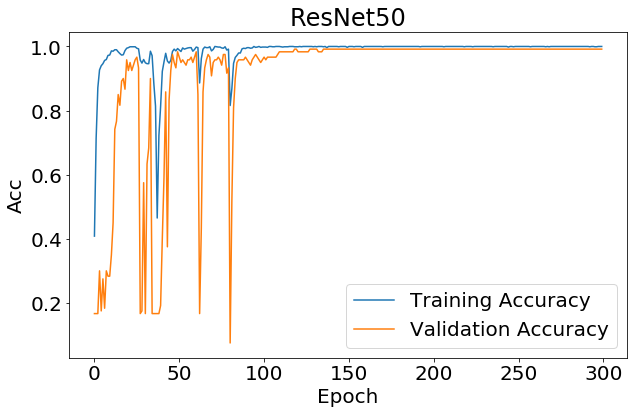

In [9]:
acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']

fig1,ax1 = plt.subplots(1,1,figsize=(10,6))

ax1.plot(acc1, label='Training Accuracy')
ax1.plot(val_acc1, label='Validation Accuracy')

ax1.set_xlabel(r'Epoch', fontsize=20)
ax1.set_ylabel(r'Acc', fontsize=20)
ax1.set_title('ResNet50', fontsize=24)
ax1.tick_params(labelsize=20)

ax1.legend(loc=4, fontsize=20)

plt.show()

In [12]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'Res_18_model.h5' 
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

# Prepare callbacks for model saving and for learning rate adjustment.
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True)

model2 = ResNet18(input_shape = (64, 64, 3), classes = 6)
model2.compile(optimizer=optimizers.Adam(learning_rate=my_schedule(0)), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

Learning rate:  0.001


In [13]:
history2 = model2.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs = 300, batch_size = 32, callbacks=[scheduler, checkpoint])

Train on 1080 samples, validate on 120 samples
Learning rate:  0.001
Epoch 1/300
 992/1080 [==========================>...] - ETA: 0s - loss: 1.0661 - accuracy: 0.6310
Epoch 00001: val_accuracy improved from -inf to 0.19167, saving model to C:\Users\Wender\Notebook\proj\saved_models\ResNet_18_without_augmentation_model.h5
1080/1080 [==============================] - 3s 3ms/sample - loss: 1.0212 - accuracy: 0.6463 - val_loss: 2.7318 - val_accuracy: 0.1917
Learning rate:  0.001
Epoch 2/300
 992/1080 [==========================>...] - ETA: 0s - loss: 0.2528 - accuracy: 0.9073
Epoch 00002: val_accuracy did not improve from 0.19167
1080/1080 [==============================] - 1s 700us/sample - loss: 0.2548 - accuracy: 0.9083 - val_loss: 11.7258 - val_accuracy: 0.1667
Learning rate:  0.001
Epoch 3/300
 992/1080 [==========================>...] - ETA: 0s - loss: 0.1881 - accuracy: 0.9405
Epoch 00003: val_accuracy did not improve from 0.19167
1080/1080 [==============================] - 1s 696

Learning rate:  0.001
Epoch 24/300
 992/1080 [==========================>...] - ETA: 0s - loss: 1.5968e-04 - accuracy: 1.0000
Epoch 00024: val_accuracy did not improve from 0.98333
1080/1080 [==============================] - 1s 704us/sample - loss: 1.5706e-04 - accuracy: 1.0000 - val_loss: 0.0789 - val_accuracy: 0.9833
Learning rate:  0.001
Epoch 25/300
 992/1080 [==========================>...] - ETA: 0s - loss: 1.4827e-04 - accuracy: 1.0000
Epoch 00025: val_accuracy did not improve from 0.98333
1080/1080 [==============================] - 1s 696us/sample - loss: 1.5155e-04 - accuracy: 1.0000 - val_loss: 0.0806 - val_accuracy: 0.9833
Learning rate:  0.001
Epoch 26/300
 992/1080 [==========================>...] - ETA: 0s - loss: 1.3463e-04 - accuracy: 1.0000
Epoch 00026: val_accuracy did not improve from 0.98333
1080/1080 [==============================] - 1s 699us/sample - loss: 1.4736e-04 - accuracy: 1.0000 - val_loss: 0.0801 - val_accuracy: 0.9833
Learning rate:  0.001
Epoch 27/300

Learning rate:  0.001
Epoch 50/300
 992/1080 [==========================>...] - ETA: 0s - loss: 3.3722e-05 - accuracy: 1.0000
Epoch 00050: val_accuracy did not improve from 0.98333
1080/1080 [==============================] - 1s 718us/sample - loss: 3.5136e-05 - accuracy: 1.0000 - val_loss: 0.0857 - val_accuracy: 0.9833
Learning rate:  0.001
Epoch 51/300
 992/1080 [==========================>...] - ETA: 0s - loss: 2.7161e-05 - accuracy: 1.0000
Epoch 00051: val_accuracy did not improve from 0.98333
1080/1080 [==============================] - 1s 704us/sample - loss: 2.7035e-05 - accuracy: 1.0000 - val_loss: 0.0861 - val_accuracy: 0.9833
Learning rate:  0.001
Epoch 52/300
 992/1080 [==========================>...] - ETA: 0s - loss: 2.8137e-05 - accuracy: 1.0000
Epoch 00052: val_accuracy did not improve from 0.98333
1080/1080 [==============================] - 1s 702us/sample - loss: 3.7024e-05 - accuracy: 1.0000 - val_loss: 0.0863 - val_accuracy: 0.9833
Learning rate:  0.001
Epoch 53/300

Learning rate:  0.001
Epoch 76/300
 992/1080 [==========================>...] - ETA: 0s - loss: 9.2946e-06 - accuracy: 1.0000
Epoch 00076: val_accuracy did not improve from 0.98333
1080/1080 [==============================] - 1s 705us/sample - loss: 8.9912e-06 - accuracy: 1.0000 - val_loss: 0.0967 - val_accuracy: 0.9833
Learning rate:  0.001
Epoch 77/300
 992/1080 [==========================>...] - ETA: 0s - loss: 8.3992e-06 - accuracy: 1.0000
Epoch 00077: val_accuracy did not improve from 0.98333
1080/1080 [==============================] - 1s 701us/sample - loss: 9.2641e-06 - accuracy: 1.0000 - val_loss: 0.0968 - val_accuracy: 0.9833
Learning rate:  0.001
Epoch 78/300
 992/1080 [==========================>...] - ETA: 0s - loss: 1.6005e-05 - accuracy: 1.0000
Epoch 00078: val_accuracy did not improve from 0.98333
1080/1080 [==============================] - 1s 703us/sample - loss: 1.5582e-05 - accuracy: 1.0000 - val_loss: 0.0973 - val_accuracy: 0.9833
Learning rate:  0.001
Epoch 79/300

Learning rate:  1e-05
Epoch 127/300
 992/1080 [==========================>...] - ETA: 0s - loss: 1.0848e-05 - accuracy: 1.0000
Epoch 00127: val_accuracy did not improve from 0.98333
1080/1080 [==============================] - 1s 713us/sample - loss: 1.2619e-05 - accuracy: 1.0000 - val_loss: 0.0986 - val_accuracy: 0.9833
Learning rate:  1e-05
Epoch 128/300
 992/1080 [==========================>...] - ETA: 0s - loss: 1.2049e-05 - accuracy: 1.0000
Epoch 00128: val_accuracy did not improve from 0.98333
1080/1080 [==============================] - 1s 709us/sample - loss: 1.1335e-05 - accuracy: 1.0000 - val_loss: 0.0988 - val_accuracy: 0.9833
Learning rate:  1e-05
Epoch 129/300
 992/1080 [==========================>...] - ETA: 0s - loss: 8.4438e-06 - accuracy: 1.0000
Epoch 00129: val_accuracy did not improve from 0.98333
1080/1080 [==============================] - 1s 701us/sample - loss: 8.0486e-06 - accuracy: 1.0000 - val_loss: 0.0990 - val_accuracy: 0.9833
Learning rate:  1e-05
Epoch 130

Learning rate:  1e-06
Epoch 178/300
 992/1080 [==========================>...] - ETA: 0s - loss: 1.4204e-05 - accuracy: 1.0000
Epoch 00178: val_accuracy did not improve from 0.98333
1080/1080 [==============================] - 1s 714us/sample - loss: 1.3749e-05 - accuracy: 1.0000 - val_loss: 0.0991 - val_accuracy: 0.9833
Learning rate:  1e-06
Epoch 179/300
 992/1080 [==========================>...] - ETA: 0s - loss: 7.3020e-06 - accuracy: 1.0000
Epoch 00179: val_accuracy did not improve from 0.98333
1080/1080 [==============================] - 1s 721us/sample - loss: 6.9976e-06 - accuracy: 1.0000 - val_loss: 0.0990 - val_accuracy: 0.9833
Learning rate:  1e-06
Epoch 180/300
 992/1080 [==========================>...] - ETA: 0s - loss: 1.2920e-05 - accuracy: 1.0000
Epoch 00180: val_accuracy did not improve from 0.98333
1080/1080 [==============================] - 1s 711us/sample - loss: 1.2368e-05 - accuracy: 1.0000 - val_loss: 0.0990 - val_accuracy: 0.9833
Learning rate:  1e-06
Epoch 181

Learning rate:  5e-07
Epoch 229/300
 992/1080 [==========================>...] - ETA: 0s - loss: 2.2632e-05 - accuracy: 1.0000
Epoch 00229: val_accuracy did not improve from 0.98333
1080/1080 [==============================] - 1s 721us/sample - loss: 2.0967e-05 - accuracy: 1.0000 - val_loss: 0.0989 - val_accuracy: 0.9833
Learning rate:  5e-07
Epoch 230/300
 992/1080 [==========================>...] - ETA: 0s - loss: 7.4363e-06 - accuracy: 1.0000
Epoch 00230: val_accuracy did not improve from 0.98333
1080/1080 [==============================] - 1s 729us/sample - loss: 7.0393e-06 - accuracy: 1.0000 - val_loss: 0.0986 - val_accuracy: 0.9833
Learning rate:  5e-07
Epoch 231/300
 992/1080 [==========================>...] - ETA: 0s - loss: 7.2082e-06 - accuracy: 1.0000
Epoch 00231: val_accuracy did not improve from 0.98333
1080/1080 [==============================] - 1s 712us/sample - loss: 6.9070e-06 - accuracy: 1.0000 - val_loss: 0.0986 - val_accuracy: 0.9833
Learning rate:  5e-07
Epoch 232

Learning rate:  5e-07
Epoch 280/300
 992/1080 [==========================>...] - ETA: 0s - loss: 7.1622e-06 - accuracy: 1.0000
Epoch 00280: val_accuracy did not improve from 0.98333
1080/1080 [==============================] - 1s 718us/sample - loss: 8.7126e-06 - accuracy: 1.0000 - val_loss: 0.0987 - val_accuracy: 0.9833
Learning rate:  5e-07
Epoch 281/300
 992/1080 [==========================>...] - ETA: 0s - loss: 7.9501e-06 - accuracy: 1.0000
Epoch 00281: val_accuracy did not improve from 0.98333
1080/1080 [==============================] - 1s 704us/sample - loss: 7.8648e-06 - accuracy: 1.0000 - val_loss: 0.0987 - val_accuracy: 0.9833
Learning rate:  5e-07
Epoch 282/300
 992/1080 [==========================>...] - ETA: 0s - loss: 1.0190e-05 - accuracy: 1.0000
Epoch 00282: val_accuracy did not improve from 0.98333
1080/1080 [==============================] - 1s 708us/sample - loss: 9.7120e-06 - accuracy: 1.0000 - val_loss: 0.0987 - val_accuracy: 0.9833
Learning rate:  5e-07
Epoch 283

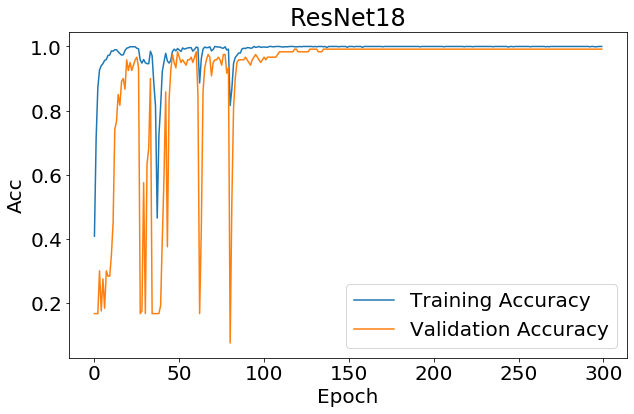

In [14]:
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']

fig2,ax2 = plt.subplots(1,1,figsize=(10,6))

ax2.plot(acc1, label='Training Accuracy')
ax2.plot(val_acc1, label='Validation Accuracy')

ax2.set_xlabel(r'Epoch', fontsize=20)
ax2.set_ylabel(r'Acc', fontsize=20)
ax2.set_title('ResNet18', fontsize=24)
ax2.tick_params(labelsize=20)

ax2.legend(loc=4, fontsize=20)

plt.show()

In [17]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'CNN_50_model.h5' 
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

# Prepare callbacks for model saving and for learning rate adjustment.
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True)

model3 = CNN50(input_shape = (64, 64, 3), classes = 6)
model3.compile(optimizer=optimizers.Adam(learning_rate=my_schedule(0)), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

Learning rate:  0.001


In [18]:
history3 = model3.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs = 300, batch_size = 32, callbacks=[scheduler, checkpoint])

Train on 1080 samples, validate on 120 samples
Learning rate:  0.001
Epoch 1/300
1056/1080 [============================>.] - ETA: 0s - loss: 2.0676 - accuracy: 0.1941
Epoch 00001: val_accuracy improved from -inf to 0.16667, saving model to C:\Users\Wender\Notebook\proj\saved_models\CNN_50_without_augmentation_model.h5
1080/1080 [==============================] - 7s 6ms/sample - loss: 2.0620 - accuracy: 0.1935 - val_loss: 1.7961 - val_accuracy: 0.1667
Learning rate:  0.001
Epoch 2/300
1056/1080 [============================>.] - ETA: 0s - loss: 1.8242 - accuracy: 0.1903
Epoch 00002: val_accuracy did not improve from 0.16667
1080/1080 [==============================] - 1s 1ms/sample - loss: 1.8270 - accuracy: 0.1917 - val_loss: 1.7946 - val_accuracy: 0.1667
Learning rate:  0.001
Epoch 3/300
1056/1080 [============================>.] - ETA: 0s - loss: 1.8027 - accuracy: 0.2188
Epoch 00003: val_accuracy did not improve from 0.16667
1080/1080 [==============================] - 1s 1ms/sampl

Learning rate:  0.001
Epoch 27/300
1056/1080 [============================>.] - ETA: 0s - loss: 0.7042 - accuracy: 0.7396
Epoch 00027: val_accuracy did not improve from 0.25000
1080/1080 [==============================] - 1s 1ms/sample - loss: 0.7114 - accuracy: 0.7370 - val_loss: 16.1964 - val_accuracy: 0.1667
Learning rate:  0.001
Epoch 28/300
1056/1080 [============================>.] - ETA: 0s - loss: 0.7838 - accuracy: 0.6970
Epoch 00028: val_accuracy did not improve from 0.25000
1080/1080 [==============================] - 1s 1ms/sample - loss: 0.7999 - accuracy: 0.7028 - val_loss: 9.2194 - val_accuracy: 0.1583
Learning rate:  0.001
Epoch 29/300
1056/1080 [============================>.] - ETA: 0s - loss: 0.6861 - accuracy: 0.7860
Epoch 00029: val_accuracy did not improve from 0.25000
1080/1080 [==============================] - 1s 1ms/sample - loss: 0.7078 - accuracy: 0.7787 - val_loss: 34.7796 - val_accuracy: 0.2500
Learning rate:  0.001
Epoch 30/300
1056/1080 [================

Learning rate:  0.001
Epoch 52/300
1056/1080 [============================>.] - ETA: 0s - loss: 0.3244 - accuracy: 0.9072
Epoch 00052: val_accuracy did not improve from 0.85833
1080/1080 [==============================] - 1s 1ms/sample - loss: 0.3243 - accuracy: 0.9083 - val_loss: 3.7400 - val_accuracy: 0.4583
Learning rate:  0.001
Epoch 53/300
1056/1080 [============================>.] - ETA: 0s - loss: 0.1615 - accuracy: 0.9650
Epoch 00053: val_accuracy did not improve from 0.85833
1080/1080 [==============================] - 1s 1ms/sample - loss: 0.1593 - accuracy: 0.9657 - val_loss: 3.0690 - val_accuracy: 0.4583
Learning rate:  0.001
Epoch 54/300
1056/1080 [============================>.] - ETA: 0s - loss: 0.1884 - accuracy: 0.9517
Epoch 00054: val_accuracy did not improve from 0.85833
1080/1080 [==============================] - 1s 1ms/sample - loss: 0.1911 - accuracy: 0.9481 - val_loss: 2.4284 - val_accuracy: 0.5000
Learning rate:  0.001
Epoch 55/300
1056/1080 [==================

Learning rate:  0.0001
Epoch 104/300
1056/1080 [============================>.] - ETA: 0s - loss: 0.0129 - accuracy: 0.9981
Epoch 00104: val_accuracy did not improve from 0.95833
1080/1080 [==============================] - 1s 1ms/sample - loss: 0.0127 - accuracy: 0.9981 - val_loss: 0.2765 - val_accuracy: 0.9417
Learning rate:  0.0001
Epoch 105/300
1056/1080 [============================>.] - ETA: 0s - loss: 0.0125 - accuracy: 0.9981
Epoch 00105: val_accuracy did not improve from 0.95833
1080/1080 [==============================] - 1s 1ms/sample - loss: 0.0125 - accuracy: 0.9981 - val_loss: 0.2562 - val_accuracy: 0.9417
Learning rate:  0.0001
Epoch 106/300
1056/1080 [============================>.] - ETA: 0s - loss: 0.0108 - accuracy: 0.9991
Epoch 00106: val_accuracy did not improve from 0.95833
1080/1080 [==============================] - 1s 1ms/sample - loss: 0.0106 - accuracy: 0.9991 - val_loss: 0.2457 - val_accuracy: 0.9583
Learning rate:  0.0001
Epoch 107/300
1056/1080 [==========

Learning rate:  1e-05
Epoch 130/300
1056/1080 [============================>.] - ETA: 0s - loss: 0.0253 - accuracy: 0.9972
Epoch 00130: val_accuracy did not improve from 0.96667
1080/1080 [==============================] - 1s 1ms/sample - loss: 0.0247 - accuracy: 0.9972 - val_loss: 0.2887 - val_accuracy: 0.9583
Learning rate:  1e-05
Epoch 131/300
1056/1080 [============================>.] - ETA: 0s - loss: 0.0090 - accuracy: 0.9991
Epoch 00131: val_accuracy did not improve from 0.96667
1080/1080 [==============================] - 1s 1ms/sample - loss: 0.0399 - accuracy: 0.9926 - val_loss: 0.2875 - val_accuracy: 0.9583
Learning rate:  1e-05
Epoch 132/300
1056/1080 [============================>.] - ETA: 0s - loss: 0.0094 - accuracy: 0.9991
Epoch 00132: val_accuracy did not improve from 0.96667
1080/1080 [==============================] - 1s 1ms/sample - loss: 0.0093 - accuracy: 0.9991 - val_loss: 0.2840 - val_accuracy: 0.9583
Learning rate:  1e-05
Epoch 133/300
1056/1080 [==============

1056/1080 [============================>.] - ETA: 0s - loss: 0.0082 - accuracy: 0.9981
Epoch 00182: val_accuracy did not improve from 0.96667
1080/1080 [==============================] - 1s 1ms/sample - loss: 0.0081 - accuracy: 0.9981 - val_loss: 0.2719 - val_accuracy: 0.9583
Learning rate:  5e-07
Epoch 183/300
1056/1080 [============================>.] - ETA: 0s - loss: 0.0035 - accuracy: 1.0000
Epoch 00183: val_accuracy did not improve from 0.96667
1080/1080 [==============================] - 1s 1ms/sample - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.2717 - val_accuracy: 0.9583
Learning rate:  5e-07
Epoch 184/300
1056/1080 [============================>.] - ETA: 0s - loss: 0.0035 - accuracy: 1.0000
Epoch 00184: val_accuracy did not improve from 0.96667
1080/1080 [==============================] - 1s 1ms/sample - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.2712 - val_accuracy: 0.9583
Learning rate:  5e-07
Epoch 185/300
1056/1080 [============================>.] - ETA: 0s - loss: 

1056/1080 [============================>.] - ETA: 0s - loss: 0.0042 - accuracy: 1.0000
Epoch 00234: val_accuracy did not improve from 0.96667
1080/1080 [==============================] - 1s 1ms/sample - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.2677 - val_accuracy: 0.9583
Learning rate:  5e-07
Epoch 235/300
1056/1080 [============================>.] - ETA: 0s - loss: 0.0035 - accuracy: 1.0000
Epoch 00235: val_accuracy did not improve from 0.96667
1080/1080 [==============================] - 1s 1ms/sample - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.2678 - val_accuracy: 0.9583
Learning rate:  5e-07
Epoch 236/300
1056/1080 [============================>.] - ETA: 0s - loss: 0.0037 - accuracy: 1.0000
Epoch 00236: val_accuracy did not improve from 0.96667
1080/1080 [==============================] - 1s 1ms/sample - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.2684 - val_accuracy: 0.9583
Learning rate:  5e-07
Epoch 237/300
1056/1080 [============================>.] - ETA: 0s - loss: 

1056/1080 [============================>.] - ETA: 0s - loss: 0.0031 - accuracy: 1.0000
Epoch 00286: val_accuracy did not improve from 0.96667
1080/1080 [==============================] - 1s 1ms/sample - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.2714 - val_accuracy: 0.9583
Learning rate:  5e-07
Epoch 287/300
1056/1080 [============================>.] - ETA: 0s - loss: 0.0037 - accuracy: 1.0000
Epoch 00287: val_accuracy did not improve from 0.96667
1080/1080 [==============================] - 1s 1ms/sample - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.2710 - val_accuracy: 0.9583
Learning rate:  5e-07
Epoch 288/300
1056/1080 [============================>.] - ETA: 0s - loss: 0.0046 - accuracy: 1.0000
Epoch 00288: val_accuracy did not improve from 0.96667
1080/1080 [==============================] - 1s 1ms/sample - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.2762 - val_accuracy: 0.9500
Learning rate:  5e-07
Epoch 289/300
1056/1080 [============================>.] - ETA: 0s - loss: 

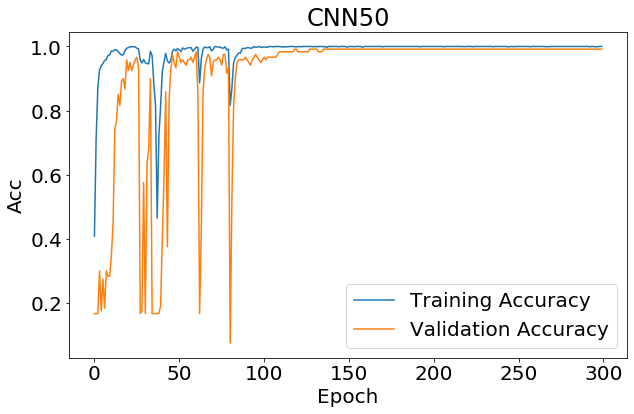

In [19]:
acc3 = history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']

fig3,ax3 = plt.subplots(1,1,figsize=(10,6))

ax3.plot(acc1, label='Training Accuracy')
ax3.plot(val_acc1, label='Validation Accuracy')

ax3.set_xlabel(r'Epoch', fontsize=20)
ax3.set_ylabel(r'Acc', fontsize=20)
ax3.set_title('CNN50', fontsize=24)
ax3.tick_params(labelsize=20)

ax3.legend(loc=4, fontsize=20)

plt.show()

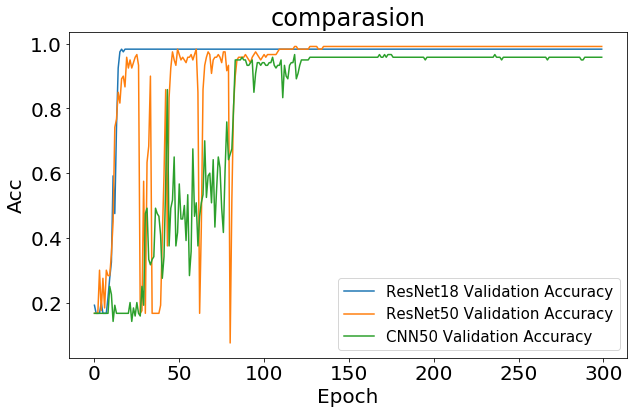

In [21]:
fig4,ax4 = plt.subplots(1,1,figsize=(10,6))

#ax4.plot(acc2, label='ResNet18 Training Accuracy')
ax4.plot(val_acc2, label='ResNet18 Validation Accuracy')
#ax4.plot(acc1, label='ResNet50 Training Accuracy')
ax4.plot(val_acc1, label='ResNet50 Validation Accuracy')
#ax4.plot(acc3, label='CNN50 Training Accuracy')
ax4.plot(val_acc3, label='CNN50 Validation Accuracy')

ax4.set_xlabel(r'Epoch', fontsize=20)
ax4.set_ylabel(r'Acc', fontsize=20)
ax4.set_title('comparasion', fontsize=24)

ax4.tick_params(labelsize=20)
ax4.legend(loc=4, fontsize=15)

plt.show()

In [22]:
model1.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 32, 32, 64)   9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 32, 32, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [23]:
model2.summary()

Model: "ResNet18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 70, 70, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 32, 32, 64)   9472        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 32, 32, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [24]:
model3.summary()

Model: "CNN50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 32, 32, 64)        9472      
_________________________________________________________________
bn_conv1 (BatchNormalization (None, 32, 32, 64)        256       
_________________________________________________________________
activation_66 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
stage2-1_conv2d_1 (Conv2D)   (None, 15, 15, 64)        4160  